In [43]:
%matplotlib inline

import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
# Load the dataset
data = pd.read_csv('data/ds_salaries.csv')
data.dropna(inplace=True)

In [64]:
data1 = pd.read_csv('data/ds_salaries.csv')

employee = data1['employee_residence'].unique()

print(data1['company_location'].unique().tolist())
print(data1['employee_residence'].unique().tolist())

country_codes = list(set(data1['company_location'].unique()) ^ set(data1['employee_residence'].unique()))

print(country_codes)

for i in country_codes:
    if i not in employee:
        print(i)

['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT', 'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU', 'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR', 'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE']
['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL', 'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES', 'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA', 'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS', 'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO', 'IE', 'CH']
['IL', 'BG', 'HK', 'JE', 'PR', 'TN', 'RS', 'BO', 'AR', 'PH', 'AS']
IL
AS


In [65]:
def country_code(name):
    codes = ['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL', 'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES', 'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA', 'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS', 'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO', 'IE', 'CH', 'IL', 'AS']
    names = ['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States', 'Hungary', 'New Zealand', 'France', 'India', 'Pakistan', 'Poland', 'Portugal', 'China', 'Greece', 'United Arab Emirates', 'Netherlands', 'Mexico', 'Canada', 'Austria', 'Nigeria', 'Philippines', 'Spain', 'Denmark', 'Russia', 'Italy', 'Croatia', 'Bulgaria', 'Singapore', 'Brazil', 'Iraq', 'Vietnam', 'Belgium', 'Ukraine', 'Malta', 'Chile', 'Romania', 'Iran', 'Colombia', 'Moldova', 'Kenya', 'Slovenia', 'Hong Kong', 'Turkey', 'Serbia', 'Puerto Rico', 'Luxembourg', 'Jersey', 'Czechia', 'Argentina', 'Algeria', 'Tunisia', 'Malaysia', 'Estonia', 'Australia', 'Bolivia', 'Ireland', 'Switzerland', 'Israel', 'American Samoa']

    return codes[names.index(name)]

print(country_code('Czechia'))

CZ


In [149]:
data.drop(['salary', 'salary_currency', 'employee_residence'], axis=1, inplace=True)
print(data.head())

   id  work_year experience_level employment_type                   job_title  \
0   0       2020               MI              FT              Data Scientist   
1   1       2020               SE              FT  Machine Learning Scientist   
2   2       2020               SE              FT           Big Data Engineer   
3   3       2020               MI              FT        Product Data Analyst   
4   4       2020               SE              FT   Machine Learning Engineer   

   salary_in_usd  remote_ratio company_location company_size  
0          79833             0               DE            L  
1         260000             0               JP            S  
2         109024            50               GB            M  
3          20000             0               HN            S  
4         150000            50               US            L  


In [150]:
data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
data['company_size'] = data['company_size'].map({'S': 0, 'M': 1, 'L': 2})
print(data.head())

   id  work_year  experience_level employment_type  \
0   0       2020                 1              FT   
1   1       2020                 2              FT   
2   2       2020                 2              FT   
3   3       2020                 1              FT   
4   4       2020                 2              FT   

                    job_title  salary_in_usd  remote_ratio company_location  \
0              Data Scientist          79833             0               DE   
1  Machine Learning Scientist         260000             0               JP   
2           Big Data Engineer         109024            50               GB   
3        Product Data Analyst          20000             0               HN   
4   Machine Learning Engineer         150000            50               US   

   company_size  
0             2  
1             0  
2             1  
3             0  
4             2  


In [151]:
title = data['job_title'].unique()
print(sorted(title))

['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', 'Applied Machine Learning Scientist', 'BI Data Analyst', 'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst', 'Cloud Data Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 'Data Analyst', 'Data Analytics Engineer', 'Data Analytics Lead', 'Data Analytics Manager', 'Data Architect', 'Data Engineer', 'Data Engineering Manager', 'Data Science Consultant', 'Data Science Engineer', 'Data Science Manager', 'Data Scientist', 'Data Specialist', 'Director of Data Engineering', 'Director of Data Science', 'ETL Developer', 'Finance Data Analyst', 'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'Head of Machine Learning', 'Lead Data Analyst', 'Lead Data Engineer', 'Lead Data Scientist', 'Lead Machine Learning Engineer', 'ML Engineer', 'Machine Learning Developer', 'Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine

In [153]:
data = pd.get_dummies(data, columns=['employment_type', 'job_title', 'company_location'])
print(data.head())

   id  work_year  experience_level  salary_in_usd  remote_ratio  company_size  \
0   0       2020                 1          79833             0             2   
1   1       2020                 2         260000             0             0   
2   2       2020                 2         109024            50             1   
3   3       2020                 1          20000             0             0   
4   4       2020                 2         150000            50             2   

   employment_type_CT  employment_type_FL  employment_type_FT  \
0               False               False                True   
1               False               False                True   
2               False               False                True   
3               False               False                True   
4               False               False                True   

   employment_type_PT  ...  company_location_PL  company_location_PT  \
0               False  ...                False   

In [139]:
['work_year', 'experience_level', 'remote_ratio', 'company_size', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'job_title_3D Computer Vision Researcher', 'job_title_AI Scientist', 'job_title_Analytics Engineer', 'job_title_Applied Data Scientist', 'job_title_Applied Machine Learning Scientist', 'job_title_BI Data Analyst', 'job_title_Big Data Architect', 'job_title_Big Data Engineer', 'job_title_Business Data Analyst', 'job_title_Cloud Data Engineer', 'job_title_Computer Vision Engineer', 'job_title_Computer Vision Software Engineer', 'job_title_Data Analyst', 'job_title_Data Analytics Engineer', 'job_title_Data Analytics Lead', 'job_title_Data Analytics Manager', 'job_title_Data Architect', 'job_title_Data Engineer', 'job_title_Data Engineering Manager', 'job_title_Data Science Consultant', 'job_title_Data Science Engineer', 'job_title_Data Science Manager', 'job_title_Data Scientist', 'job_title_Data Specialist', 'job_title_Director of Data Engineering', 'job_title_Director of Data Science', 'job_title_ETL Developer', 'job_title_Finance Data Analyst', 'job_title_Financial Data Analyst', 'job_title_Head of Data', 'job_title_Head of Data Science', 'job_title_Head of Machine Learning', 'job_title_Lead Data Analyst', 'job_title_Lead Data Engineer', 'job_title_Lead Data Scientist', 'job_title_Lead Machine Learning Engineer', 'job_title_ML Engineer', 'job_title_Machine Learning Developer', 'job_title_Machine Learning Engineer', 'job_title_Machine Learning Infrastructure Engineer', 'job_title_Machine Learning Manager', 'job_title_Machine Learning Scientist', 'job_title_Marketing Data Analyst', 'job_title_NLP Engineer', 'job_title_Principal Data Analyst', 'job_title_Principal Data Engineer', 'job_title_Principal Data Scientist', 'job_title_Product Data Analyst', 'job_title_Research Scientist', 'job_title_Staff Data Scientist', 'company_location_AE', 'company_location_AS', 'company_location_AT', 'company_location_AU', 'company_location_BE', 'company_location_BR', 'company_location_CA', 'company_location_CH', 'company_location_CL', 'company_location_CN', 'company_location_CO', 'company_location_CZ', 'company_location_DE', 'company_location_DK', 'company_location_DZ', 'company_location_EE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_HN', 'company_location_HR', 'company_location_HU', 'company_location_IE', 'company_location_IL', 'company_location_IN', 'company_location_IQ', 'company_location_IR', 'company_location_IT', 'company_location_JP', 'company_location_KE', 'company_location_LU', 'company_location_MD', 'company_location_MT', 'company_location_MX', 'company_location_MY', 'company_location_NG', 'company_location_NL', 'company_location_NZ', 'company_location_PK', 'company_location_PL', 'company_location_PT', 'company_location_RO', 'company_location_RU', 'company_location_SG', 'company_location_SI', 'company_location_TR', 'company_location_UA', 'company_location_US', 'company_location_VN']

def group_col(col, target):
    group = []
    output = []
    for i in features:
        if i.startswith(col):
            group.append(i)
            if i == target:
                output.append(True)
            else:
                output.append(False)

    print(output)
    print(group)
    
    return output


group_col('employment_type', 'employment_type_FT')

[False, False, True, False]
['employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT']


[False, False, True, False]

In [154]:
features = data.columns.drop(['id', 'salary_in_usd']).tolist()
target = 'salary_in_usd'

print(features)
print(len(features))

['work_year', 'experience_level', 'remote_ratio', 'company_size', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'job_title_3D Computer Vision Researcher', 'job_title_AI Scientist', 'job_title_Analytics Engineer', 'job_title_Applied Data Scientist', 'job_title_Applied Machine Learning Scientist', 'job_title_BI Data Analyst', 'job_title_Big Data Architect', 'job_title_Big Data Engineer', 'job_title_Business Data Analyst', 'job_title_Cloud Data Engineer', 'job_title_Computer Vision Engineer', 'job_title_Computer Vision Software Engineer', 'job_title_Data Analyst', 'job_title_Data Analytics Engineer', 'job_title_Data Analytics Lead', 'job_title_Data Analytics Manager', 'job_title_Data Architect', 'job_title_Data Engineer', 'job_title_Data Engineering Manager', 'job_title_Data Science Consultant', 'job_title_Data Science Engineer', 'job_title_Data Science Manager', 'job_title_Data Scientist', 'job_title_Data Specialist', 'job_title_Director of Data 

In [155]:
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=30, learning_rate=0.3, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 43912.62454584998
R2: 0.4968600681002996


In [185]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-validated R^2 scores:", scores)
print("Average cross-validation R^2 score:", scores.mean())

Cross-validated R^2 scores: [0.39430353 0.46625989 0.48878478 0.36484374 0.38195206]
Average cross-validation R^2 score: 0.41922880123526624


[0.95054624 0.81836249 0.82092246 0.79042122 0.7685122  0.76431864
 0.75141694 0.72046332 0.70468855 0.6953538 ]
[0.17785532 0.2374441  0.30878333 0.32485156 0.34557779 0.3663827
 0.35665047 0.38345356 0.42107108 0.42291396]


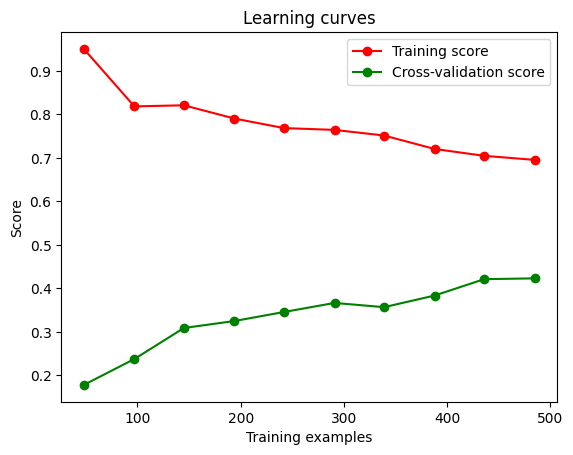

In [186]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(train_scores_mean)
print(test_scores_mean)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

In [187]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)